<h1 style='text-align: center'>Real Estate Price Valuation</h1>

In [963]:
import warnings
warnings.filterwarnings('ignore')

In [964]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [965]:
df = pd.read_csv('valuation.csv')
df

,No,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


## Data Preprocessing

In [966]:
# dropping the column called No
df = df.drop(columns=['No'])
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [967]:
# converting the date column to datetime
df['Transaction date'] = df['Transaction date'].apply(lambda x: pd.to_datetime(f"{int(x):.0f}", format='%Y') + pd.Timedelta(days=(x % 1) * 365.25))

# Extract date component
df['Transaction date'] = df['Transaction date'].dt.date
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-11-30,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-11-30,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013-01-01,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012-08-31,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013-04-02,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013-01-01,8.1,104.81010,5,24.96674,121.54067,52.5


In [968]:
# checking the dimensions of the dataset
columns = df.shape[1]
rows = df.shape[0]

print(f"Number of features in the dataset: {columns}")
print(f"Number of data points in the dataset: {rows}")

Number of features in the dataset: 7
Number of data points in the dataset: 414


In [969]:
# checking the datatypes of the columns 
df.dtypes

Transaction date                        object
House age                              float64
Distance to the nearest MRT station    float64
Number of convenience stores             int64
Latitude                               float64
Longitude                              float64
House price of unit area               float64
dtype: object

In [970]:
df["Transaction date"] = pd.to_datetime(df["Transaction date"])

In [971]:
df.dtypes

Transaction date                       datetime64[ns]
House age                                     float64
Distance to the nearest MRT station           float64
Number of convenience stores                    int64
Latitude                                      float64
Longitude                                     float64
House price of unit area                      float64
dtype: object

In [972]:
# checking for any potential null values
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [973]:
# checking the statistical measures of the dataset
df.describe()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013-02-23 15:25:13.043478272,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
min,2012-08-31 00:00:00,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012-11-30 00:00:00,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013-03-02 00:00:00,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013-06-02 00:00:00,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013-08-01 00:00:00,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000
std,NaN,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488


## Data Visualization

In [974]:
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-11-30,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-11-30,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013-01-01,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012-08-31,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013-04-02,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013-01-01,8.1,104.81010,5,24.96674,121.54067,52.5


### Line plots

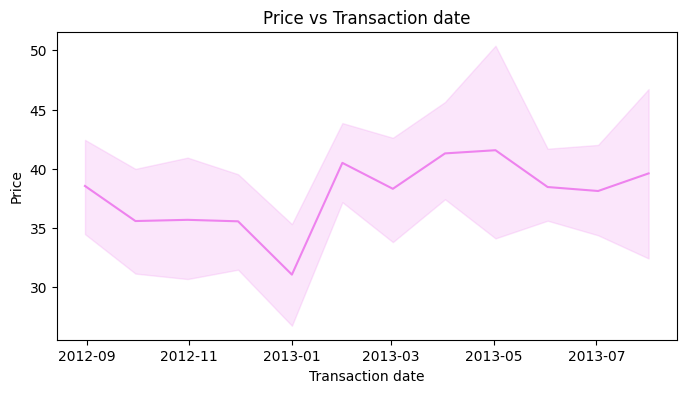

In [975]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Transaction date', y='House price of unit area', data=df, color='violet')
plt.title('Price vs Transaction date')
plt.xlabel('Transaction date')
plt.ylabel('Price')
plt.show()

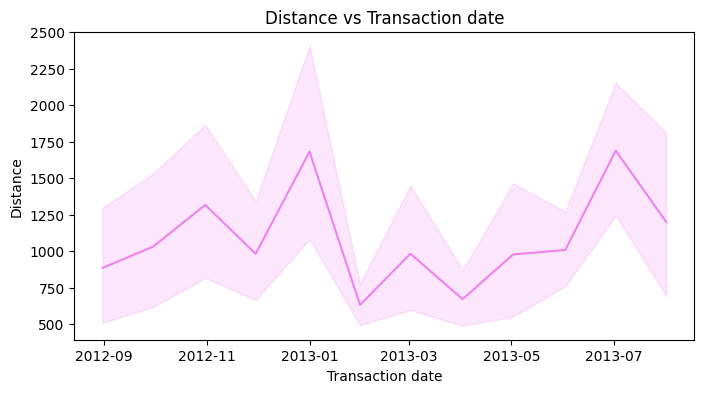

In [976]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Transaction date', y='Distance to the nearest MRT station', data=df, color='violet')
plt.title('Distance vs Transaction date')
plt.xlabel('Transaction date')
plt.ylabel('Distance')
plt.show()

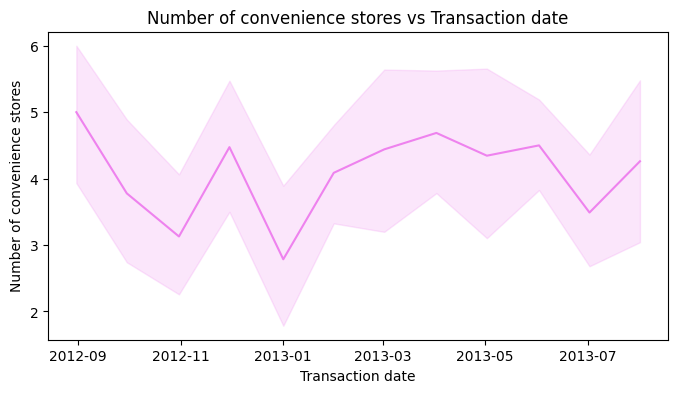

In [977]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Transaction date', y='Number of convenience stores', data=df, color='violet')
plt.title('Number of convenience stores vs Transaction date')
plt.xlabel('Transaction date')
plt.ylabel('Number of convenience stores')
plt.show()

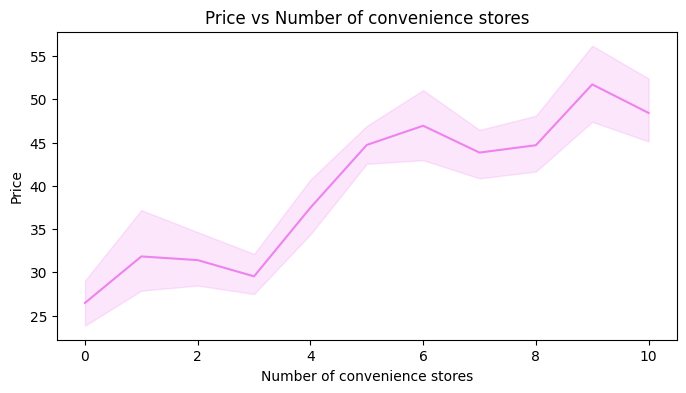

In [978]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Number of convenience stores', y='House price of unit area', data=df, color='violet')
plt.title('Price vs Number of convenience stores')
plt.xlabel('Number of convenience stores')
plt.ylabel('Price')
plt.show()

There is a general trend where if the number of convenience stores increase, the price of the house per unit area tends to increase.

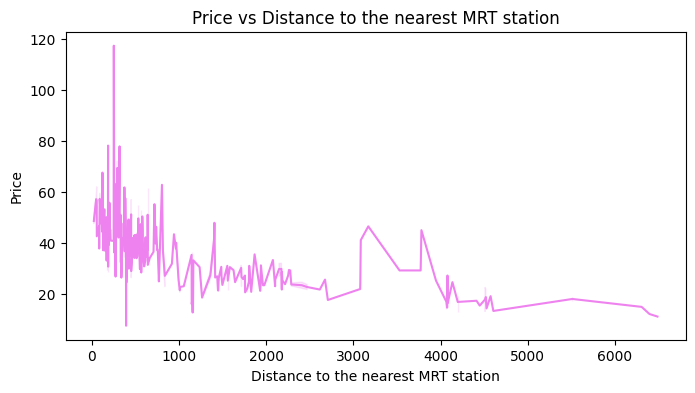

In [979]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Distance to the nearest MRT station', y='House price of unit area', data=df, color='violet')
plt.title('Price vs Distance to the nearest MRT station')
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('Price')
plt.show()

There is a clear relationship shown where if the distance to the nearest MRT station increases, the price of the house decreases.

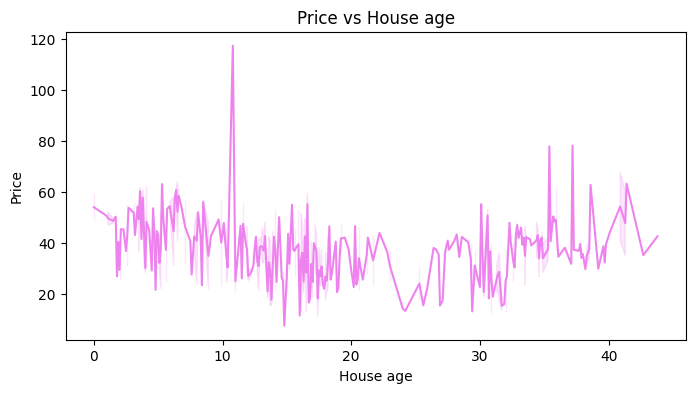

In [980]:
plt.figure(figsize=(8,4))
sns.lineplot(x='House age', y='House price of unit area', data=df, color='violet')
plt.title('Price vs House age')
plt.xlabel('House age')
plt.ylabel('Price')
plt.show()

This graph shows a mixed relationship with houses just over 10 years having the highest price.

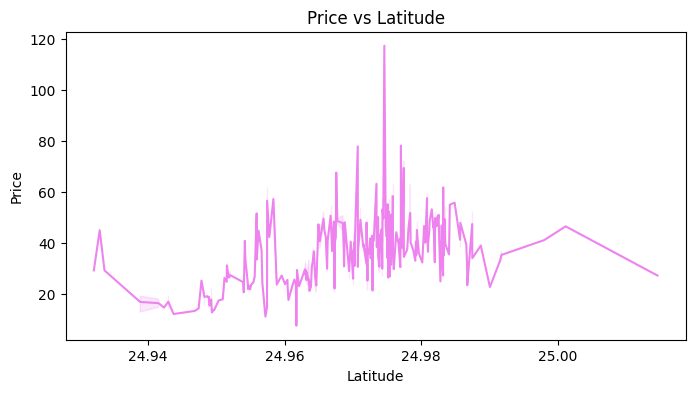

In [981]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Latitude', y='House price of unit area', data=df, color='violet')
plt.title('Price vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.show()

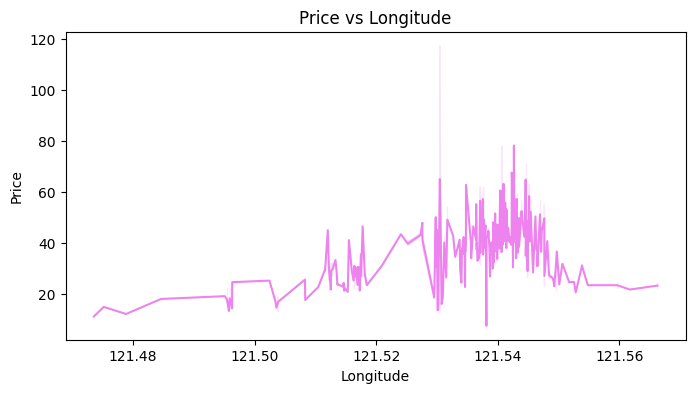

In [982]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Longitude', y='House price of unit area', data=df, color='violet')
plt.title('Price vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.show()

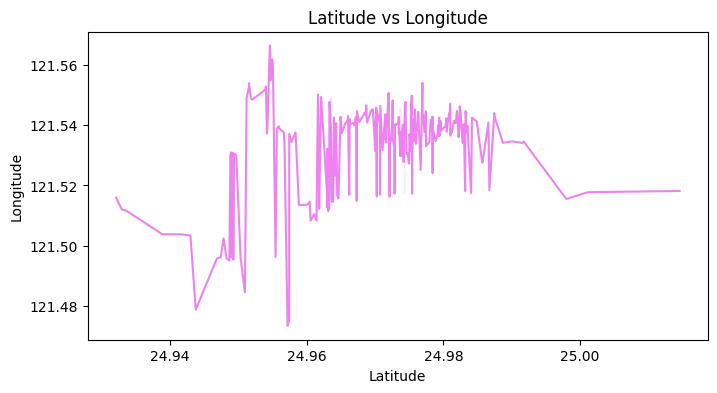

In [983]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Latitude', y='Longitude',data=df, color='violet')
plt.title('Latitude vs Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

### Box plots

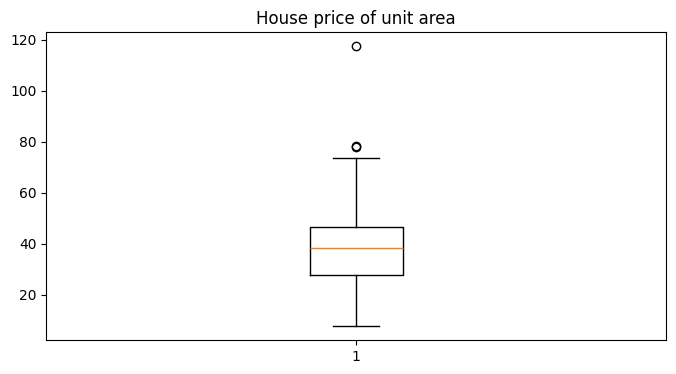

In [984]:
plt.figure(figsize=(8,4))
plt.boxplot(df['House price of unit area'])
plt.title('House price of unit area')
plt.show()

Just two entries are shown to be outliers. This could be realistic in terms of real estate industry.

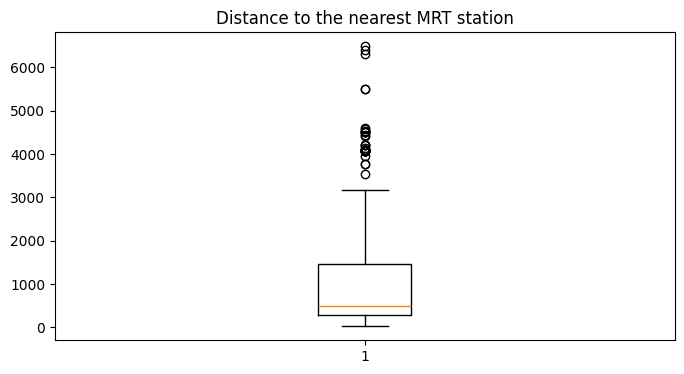

In [985]:
plt.figure(figsize=(8,4))
plt.boxplot(df['Distance to the nearest MRT station'])
plt.title('Distance to the nearest MRT station')
plt.show()

There seem to be some outliers for this feature as well. This could be ignored as it is geographically possible.

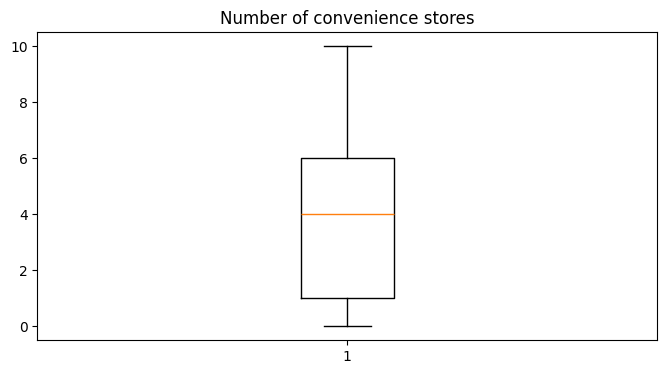

In [986]:
plt.figure(figsize=(8,4))
plt.boxplot(df['Number of convenience stores'])
plt.title('Number of convenience stores')
plt.show()

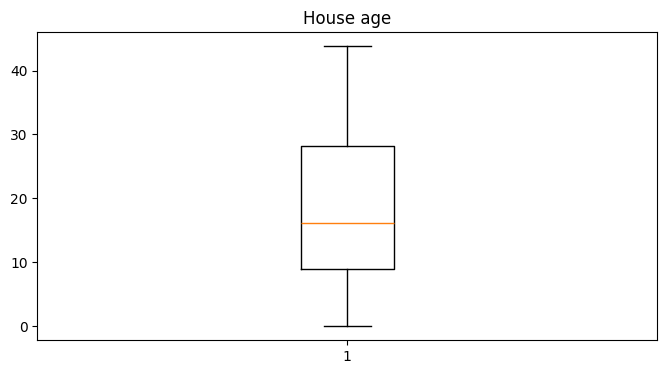

In [987]:
plt.figure(figsize=(8,4))
plt.boxplot(df['House age'])
plt.title('House age')
plt.show()

### Violin Plots

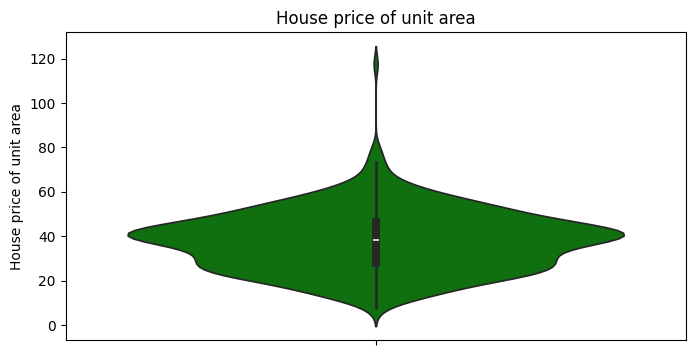

In [988]:
plt.figure(figsize=(8,4))
sns.violinplot(df['House price of unit area'], color='green')
plt.title('House price of unit area')
plt.show()

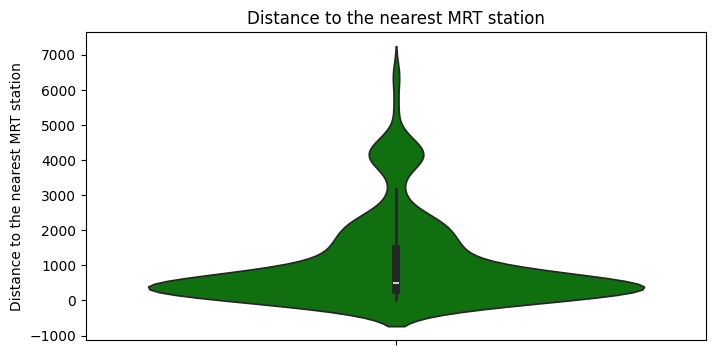

In [989]:
plt.figure(figsize=(8,4))
sns.violinplot(df['Distance to the nearest MRT station'], color='green')
plt.title('Distance to the nearest MRT station')
plt.show()

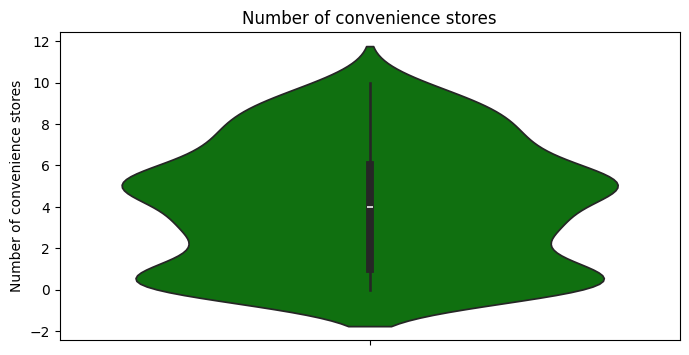

In [990]:
plt.figure(figsize=(8,4))
sns.violinplot(df['Number of convenience stores'], color='green')
plt.title('Number of convenience stores')
plt.show()

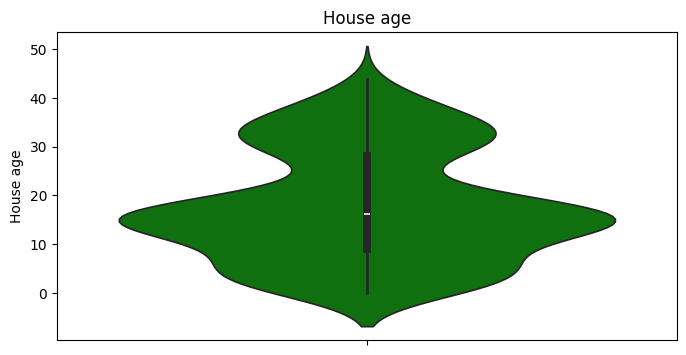

In [991]:
plt.figure(figsize=(8,4))
sns.violinplot(df['House age'], color='green')
plt.title('House age')
plt.show()

### Histograms

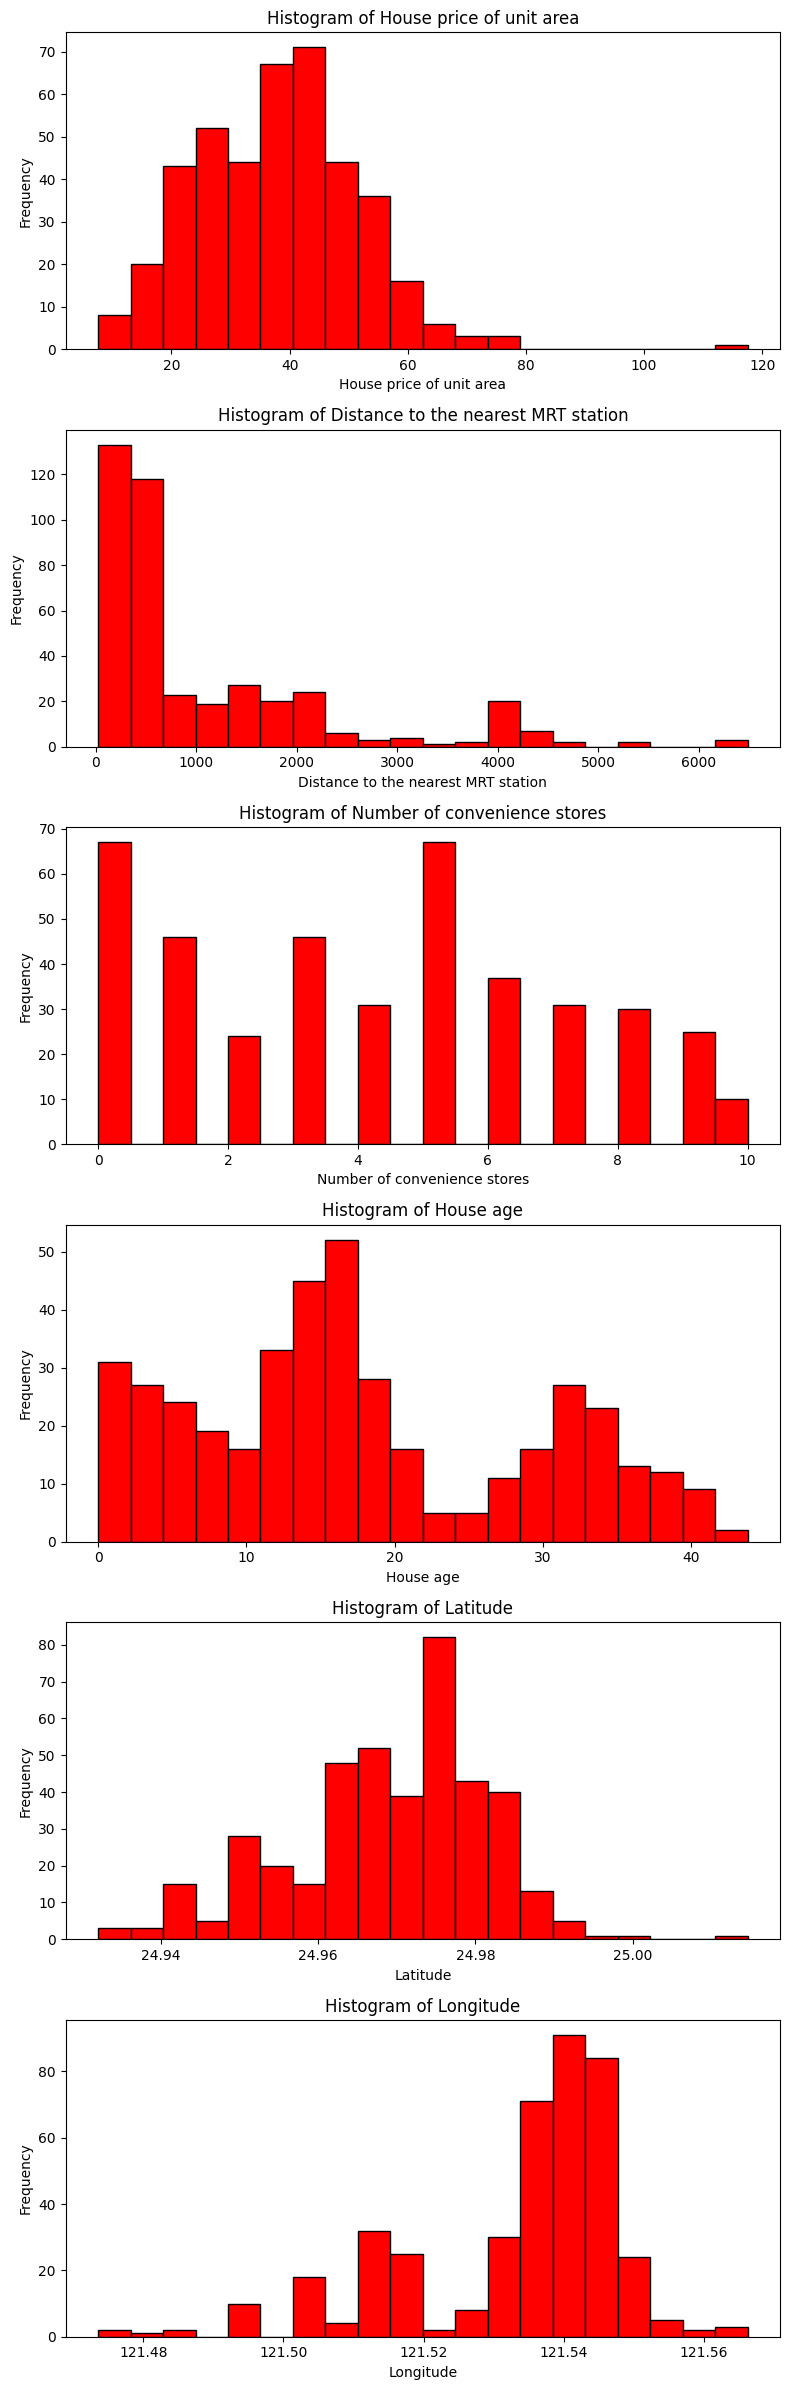

In [992]:
columns_to_plot = ['House price of unit area', 'Distance to the nearest MRT station', 
                   'Number of convenience stores', 'House age', 'Latitude', 'Longitude']

# Create subplots
fig, axs = plt.subplots(nrows=len(columns_to_plot), figsize=(8, 4*len(columns_to_plot)))

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    axs[i].hist(df[column], bins=20, color='red', edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Feature Engineering

### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

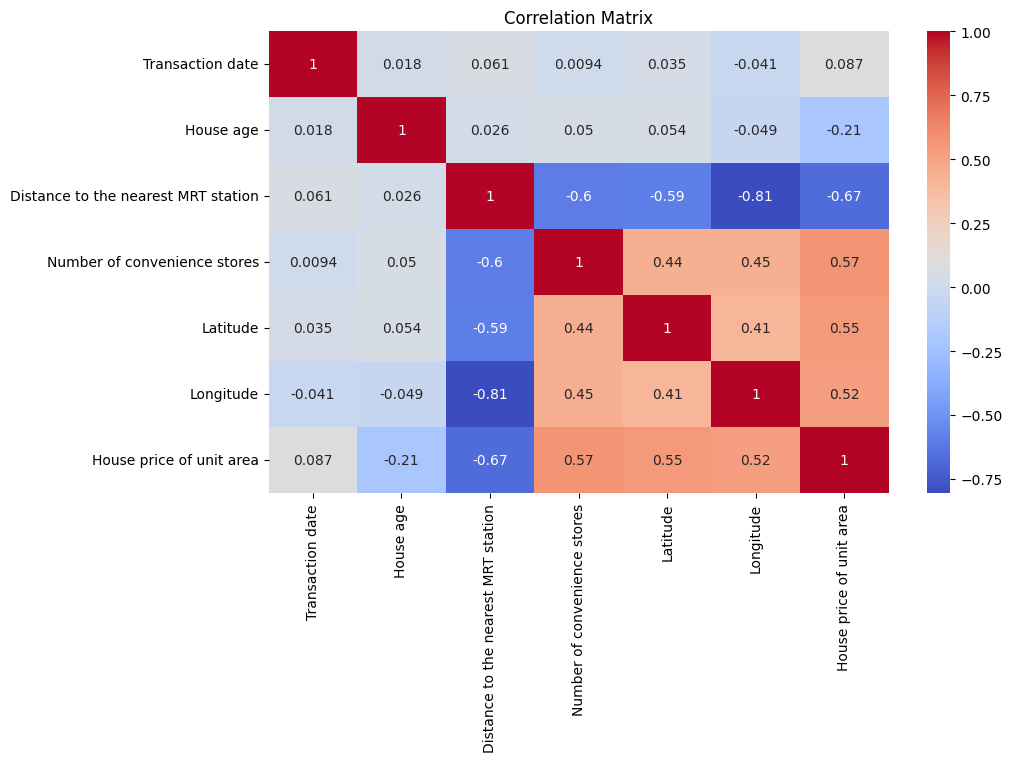

In [993]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

### Pair Plot

<Figure size 800x400 with 0 Axes>

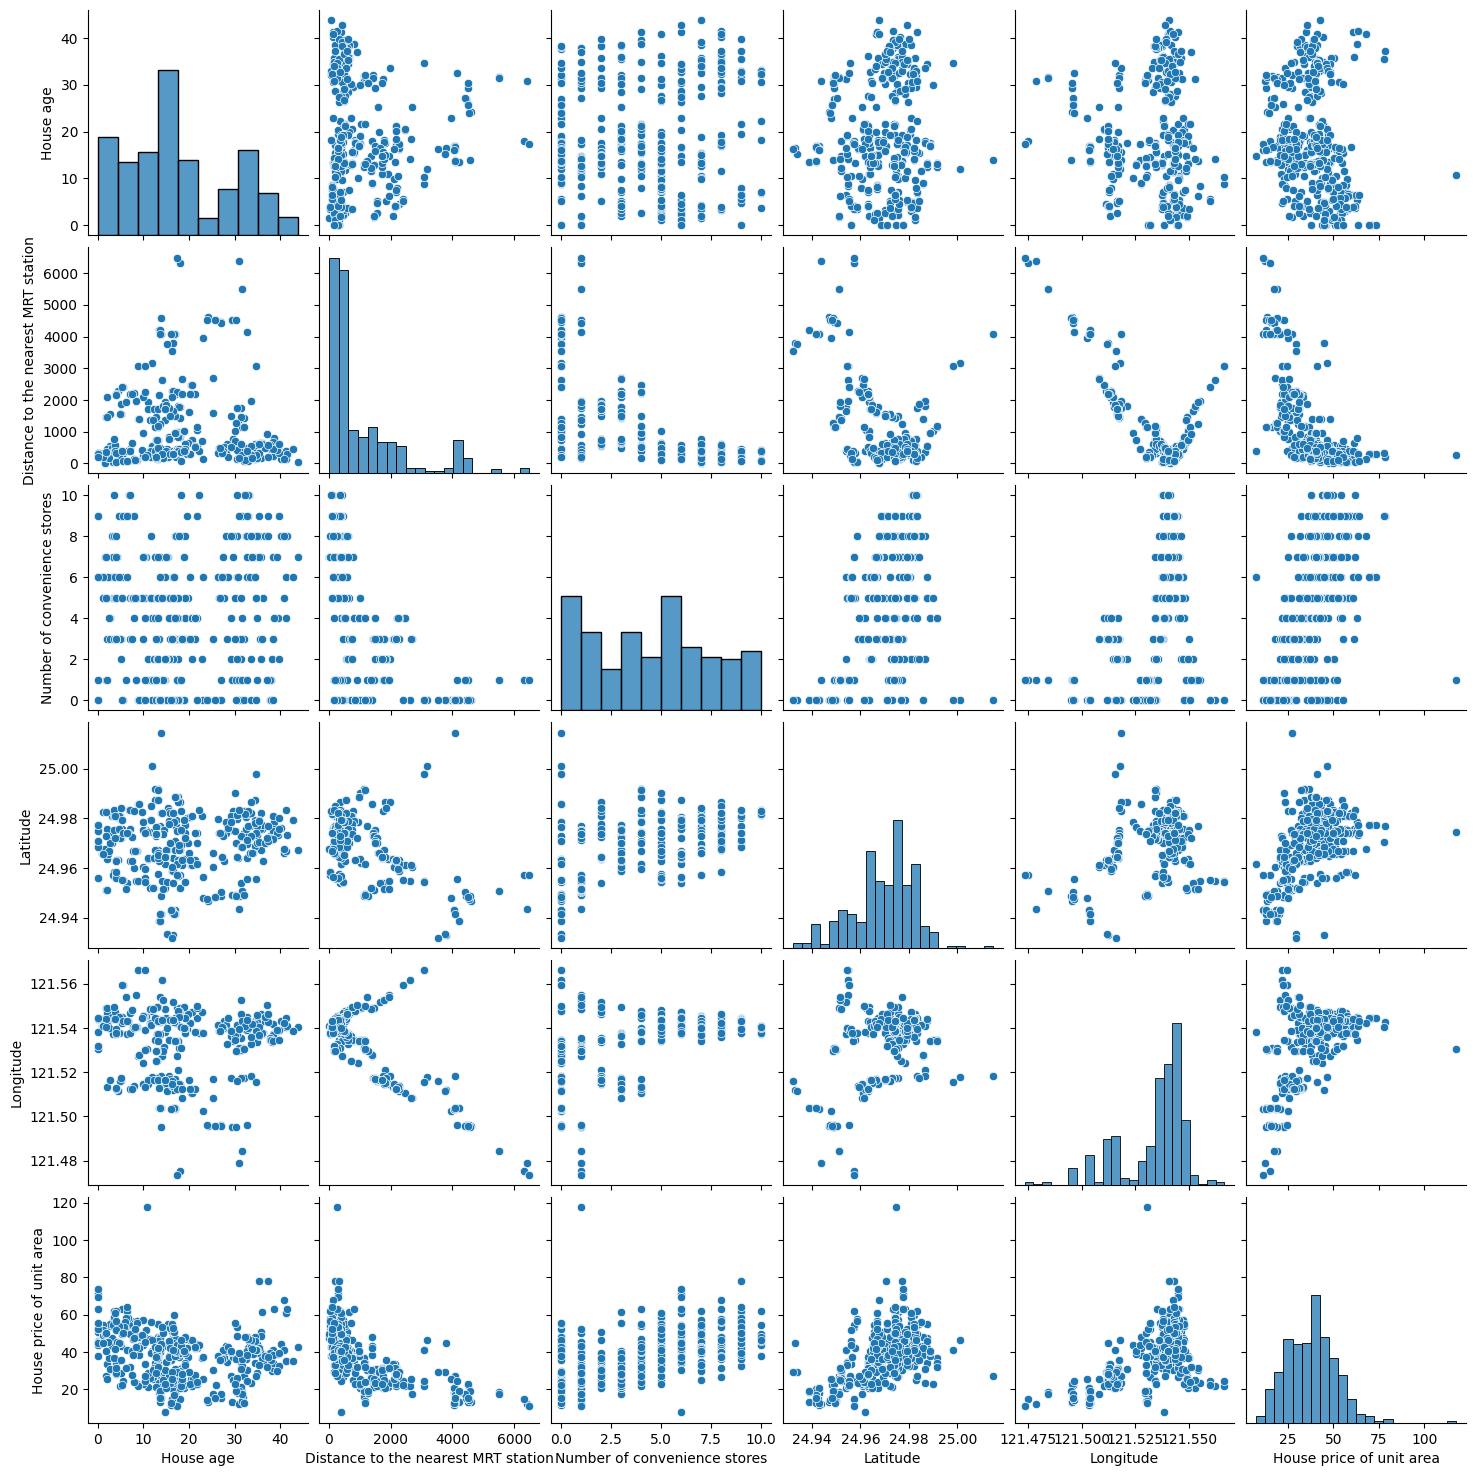

In [994]:
plt.figure(figsize=(8,4))
sns.pairplot(df)
plt.show()

### Scatter Plots

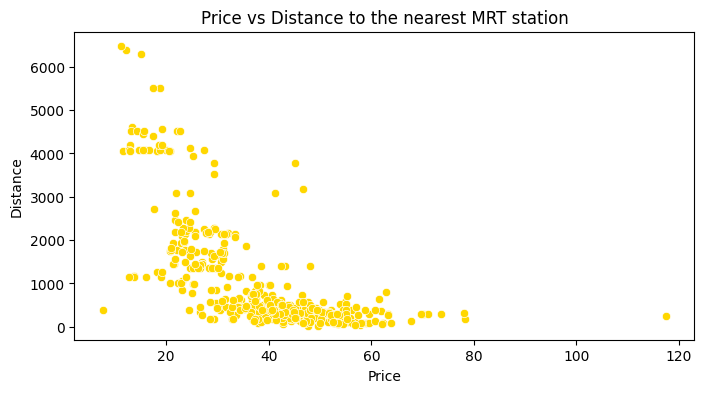

In [995]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='House price of unit area', y='Distance to the nearest MRT station', data=df, color='gold')
plt.title('Price vs Distance to the nearest MRT station')
plt.xlabel('Price')
plt.ylabel('Distance')
plt.show()

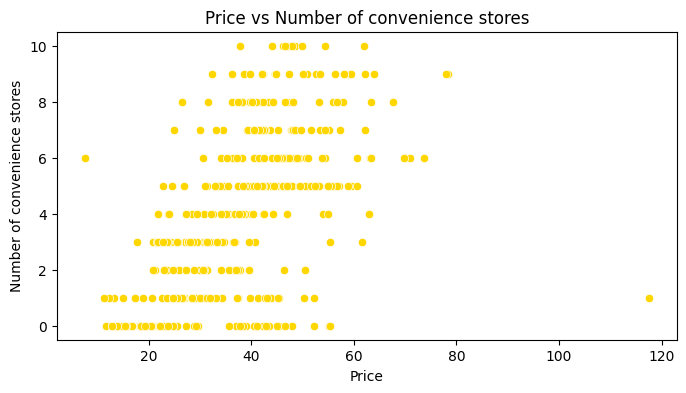

In [996]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='House price of unit area', y='Number of convenience stores', data=df, color='gold')
plt.title('Price vs Number of convenience stores')
plt.xlabel('Price')
plt.ylabel('Number of convenience stores')
plt.show()

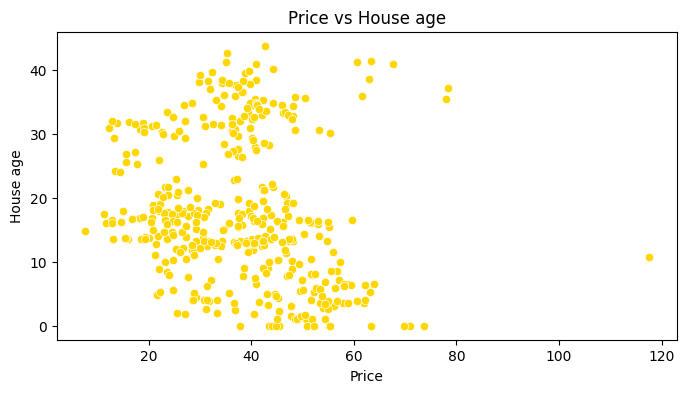

In [997]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='House price of unit area', y='House age', data=df, color='gold')
plt.title('Price vs House age')
plt.xlabel('Price')
plt.ylabel('House age')
plt.show()

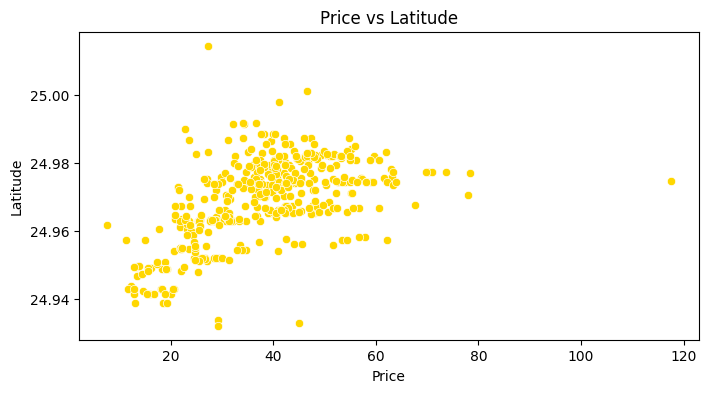

In [998]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='House price of unit area', y='Latitude', data=df, color='gold')
plt.title('Price vs Latitude')
plt.xlabel('Price')
plt.ylabel('Latitude')
plt.show()

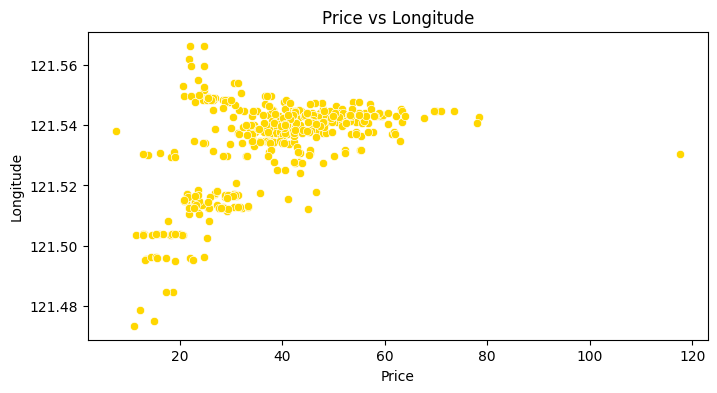

In [999]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='House price of unit area', y='Longitude', data=df, color='gold')
plt.title('Price vs Longitude')
plt.xlabel('Price')
plt.ylabel('Longitude')
plt.show()

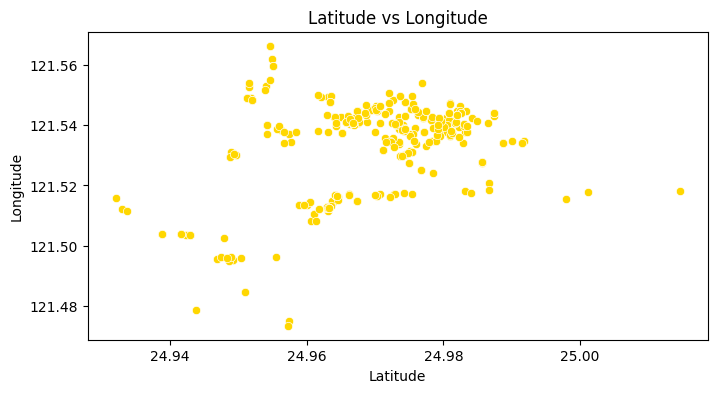

In [1000]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Latitude', y='Longitude', data=df, color='gold')
plt.title('Latitude vs Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

## Model Synthesis

In [1001]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

In [1002]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, SimpleRNN, LSTM, GRU, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [1003]:
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-11-30,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-11-30,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013-01-01,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012-08-31,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013-04-02,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013-01-01,8.1,104.81010,5,24.96674,121.54067,52.5


In [1004]:
# reference date is calculated
reference_date = df['Transaction date'].min()

# converting the date to a relative integer
df['Transaction date numeric'] = (df['Transaction date'] - reference_date).dt.days

# dropping the original date column
df.drop(columns=['Transaction date'], inplace=True)
df

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Transaction date numeric
0,32.0,84.87882,10,24.98298,121.54024,37.9,91
1,19.5,306.59470,9,24.98034,121.53951,42.2,91
2,13.3,561.98450,5,24.98746,121.54391,47.3,335
3,13.3,561.98450,5,24.98746,121.54391,54.8,305
4,5.0,390.56840,5,24.97937,121.54245,43.1,61
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4,123
410,5.6,90.45606,9,24.97433,121.54310,50.0,0
411,18.8,390.96960,7,24.97923,121.53986,40.6,214
412,8.1,104.81010,5,24.96674,121.54067,52.5,123


In [1005]:
x = df.drop(columns=['House price of unit area'], axis=1)
y = df['House price of unit area']

In [1006]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1007]:
x_train

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,Transaction date numeric
192,43.8,57.58945,7,24.96750,121.54069,183
234,8.0,2216.61200,4,24.96007,121.51361,214
5,7.1,2175.03000,3,24.96305,121.51254,0
45,36.6,488.81930,8,24.97015,121.54494,153
245,7.5,639.61980,5,24.97258,121.54814,275
...,...,...,...,...,...,...
71,35.5,640.73910,3,24.97563,121.53715,153
106,17.2,189.51810,8,24.97707,121.54308,153
270,10.8,252.58220,1,24.97460,121.53046,244
348,4.6,259.66070,6,24.97585,121.54516,61


In [1008]:
x_test

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,Transaction date numeric
358,1.1,193.5845,6,24.96571,121.54089,183
350,13.2,492.2313,5,24.96515,121.53737,123
373,0.0,274.0144,1,24.97480,121.53059,153
399,12.7,170.1289,1,24.97371,121.52984,91
369,20.2,2185.1280,3,24.96322,121.51237,0
...,...,...,...,...,...,...
31,29.6,769.4034,7,24.98281,121.53408,30
283,33.5,1978.6710,2,24.98674,121.51844,275
157,16.1,815.9314,4,24.97886,121.53464,214
203,15.6,289.3248,5,24.98203,121.54348,0


In [1009]:
y_train

192     42.7
234     23.9
5       32.1
45      38.3
245     40.8
       ...  
71      40.8
106     47.1
270    117.5
348     53.7
102     54.4
Name: House price of unit area, Length: 331, dtype: float64

In [1010]:
y_test

358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
       ... 
31     25.0
283    23.5
157    35.6
203    46.1
208    26.2
Name: House price of unit area, Length: 83, dtype: float64

### Machine Learning Models

#### Linear Regression

In [1011]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [1012]:
training_accuracy = lr.score(x_train, y_train)
testing_accuracy = lr.score(x_test, y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Training Accuracy: 0.558103840288828
Testing Accuracy: 0.6811613944873045


In [1013]:
y_predict = lr.predict(x_test)

In [1014]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)
msle = mean_squared_log_error(y_test, y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Log Error: {msle}")

Mean Absolute Error: 5.304076008161786
Mean Squared Error: 53.48828300400247
Root Mean Squared Error: 7.313568417947731
R2 Score: 0.6811613944873045
Mean Squared Log Error: 0.09299562423681089


#### Decision Tree Regressor

In [1015]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [1016]:
training_accuracy = dtr.score(x_train, y_train)
testing_accuracy = dtr.score(x_test, y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Training Accuracy: 0.9976097030996492
Testing Accuracy: 0.6159618342138296


In [1017]:
y_predict = dtr.predict(x_test)

In [1018]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)
msle = mean_squared_log_error(y_test, y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Log Error: {msle}")

Mean Absolute Error: 6.160240963855422
Mean Squared Error: 64.42614457831326
Root Mean Squared Error: 8.026589847395545
R2 Score: 0.6159618342138296
Mean Squared Log Error: 0.0505374739728517


#### Random Forest Regressor

In [1019]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [1020]:
training_accuracy = rf.score(x_train, y_train)
testing_accuracy = rf.score(x_test, y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Training Accuracy: 0.9491287248062703
Testing Accuracy: 0.7972347390296248


In [1021]:
y_predict = rf.predict(x_test)

In [1022]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)
msle = mean_squared_log_error(y_test, y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Log Error: {msle}")

Mean Absolute Error: 3.9777939759036154
Mean Squared Error: 34.01584837797189
Root Mean Squared Error: 5.832310723715935
R2 Score: 0.7972347390296248
Mean Squared Log Error: 0.025337319274393928


#### Support Vector Regressor

In [1023]:
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [1024]:
training_accuracy = svr.score(x_train, y_train)
testing_accuracy = svr.score(x_test, y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Training Accuracy: 0.5050957619616401
Testing Accuracy: 0.622042769804779


In [1025]:
y_predict = svr.predict(x_test)

In [1026]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)
msle = mean_squared_log_error(y_test, y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Log Error: {msle}")

Mean Absolute Error: 5.997718234899835
Mean Squared Error: 63.406008377131485
Root Mean Squared Error: 7.96278898233097
R2 Score: 0.622042769804779
Mean Squared Log Error: 0.05813228735536203


#### XGBoost Regressor

In [1027]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1028]:
training_accuracy = xgb.score(x_train, y_train)
testing_accuracy = xgb.score(x_test, y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Training Accuracy: 0.9975097124648638
Testing Accuracy: 0.767625718714401


In [1029]:
y_predict = xgb.predict(x_test)

In [1030]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)
msle = mean_squared_log_error(y_test, y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Log Error: {msle}")

Mean Absolute Error: 4.364532941795257
Mean Squared Error: 38.98305006154873
Root Mean Squared Error: 6.243640769739137
R2 Score: 0.767625718714401
Mean Squared Log Error: 0.03027642953715541


### Deep Learning Models

#### Artificial Neural Network (ANN)

In [1031]:
x = df.drop(columns=['House price of unit area'], axis=1).values
y = df['House price of unit area'].values

In [1032]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1033]:
s_scaler = StandardScaler()
x_train = s_scaler.fit_transform(x_train)
x_test = s_scaler.transform(x_test)

In [1034]:
ann_model = Sequential()
ann_model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.2))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.2))
ann_model.add(Dense(1)) # output layer

print(ann_model.summary())

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,985 (39.00 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 384 (1.50 KB)

None


In [1035]:
ann_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# training the model
ann_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1576.2655 - val_loss: 2137.8967
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1346.1866 - val_loss: 1771.1981
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1130.0359 - val_loss: 1495.2144
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 946.8211 - val_loss: 1173.7825
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 630.9211 - val_loss: 715.2195
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 312.2771 - val_loss: 371.8691
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 144.1626 - val_loss: 202.0273
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.5545 - val_loss: 170.8911
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 68.8771 - val_loss: 141.7250
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63.1496 - val_loss: 167.5024
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 55.5068 - val_loss: 179.5114
Epoch 12/100
10

In [1036]:
y_pred = ann_model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [1037]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Log Error: {msle}")

Mean Absolute Error: 4.453559280303587
Mean Squared Error: 40.00552269909743
Root Mean Squared Error: 6.324991912966959
R2 Score: 0.7615308558468357
Mean Squared Log Error: 0.02645269759965866


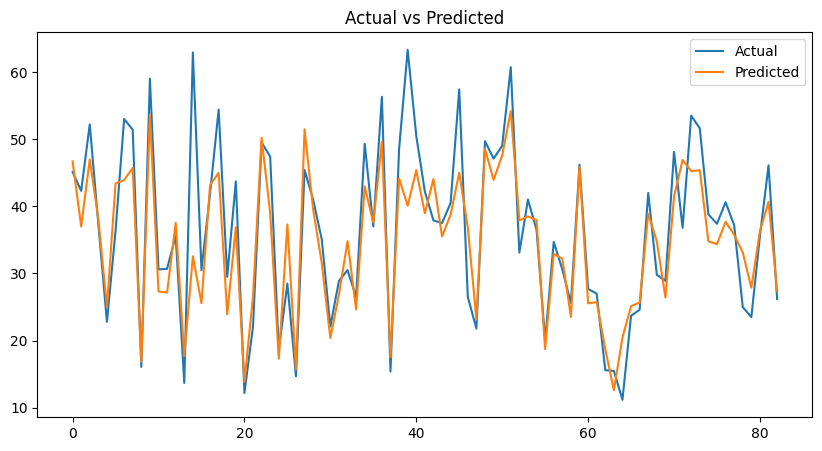

In [1038]:
# plotting a graph of actual values against predictions
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

#### Recurrent Neural Network (RNN)

##### Simple RNN

In [1039]:
# reshaping the data for a RNN
x_train_rnn = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test_rnn = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [1040]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(128, activation='relu', input_shape=(x_train_rnn.shape[1], x_train_rnn.shape[2])))
rnn_model.add(Dense(164, activation='relu'))
rnn_model.add(Dense(1)) # output layer

print(rnn_model.summary())

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 128)            │        17,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 164)            │        21,156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,601 (150.79 KB)

 Trainable params: 38,601 (150.79 KB)

 Non-trainable params: 0 (0.00 B)

None


In [1041]:
rnn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
rnn_model.fit(x_train_rnn, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1265.3732 - val_loss: 245.2826
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 238.9716 - val_loss: 261.6371
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 140.4458 - val_loss: 106.9056
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81.2542 - val_loss: 134.7006
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.9582 - val_loss: 116.8625
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.2716 - val_loss: 126.9700
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.1331 - val_loss: 99.5118
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.9257 - val_loss: 128.2347
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63.1628 - val_loss: 105.5716
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.2006 - val_loss: 98.7519
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.4832 - val_loss: 125.4960
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━

In [1042]:
y_pred = rnn_model.predict(x_test_rnn)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [1043]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Log Error: {msle}")

Mean Absolute Error: 4.964325332641601
Mean Squared Error: 45.02577173184301
Root Mean Squared Error: 6.7101245690257505
R2 Score: 0.7316056252910655
Mean Squared Log Error: 0.03725320952825513


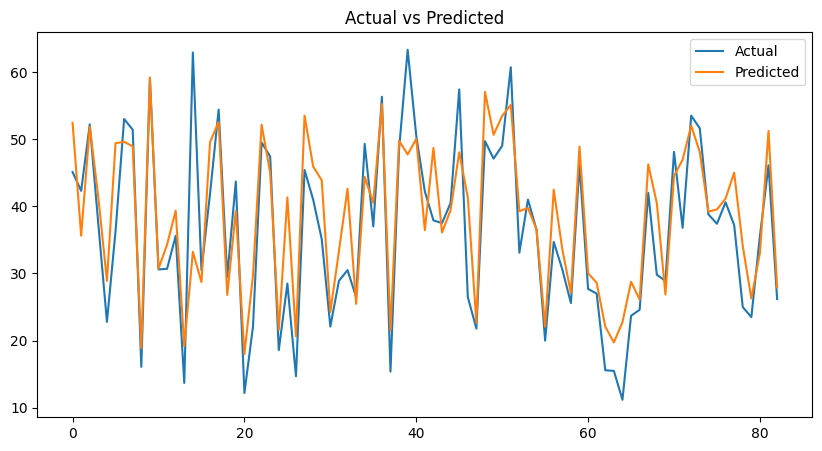

In [1044]:
# plotting a graph of actual values against predictions
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

##### Long Short Term Memory (LSTM)

In [1045]:
lstm_model = Sequential()
lstm_model.add(LSTM(128, activation='relu', input_shape=(x_train_rnn.shape[1], x_train_rnn.shape[2])))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(1)) # output layer

print(lstm_model.summary())

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 128)            │        69,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,441 (302.50 KB)

 Trainable params: 77,441 (302.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [1046]:
lstm_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
lstm_model.fit(x_train_rnn, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1570.1785 - val_loss: 2053.7710
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 976.4487 - val_loss: 383.2879
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 248.9025 - val_loss: 183.6593
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 110.0888 - val_loss: 208.4333
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 104.3871 - val_loss: 110.6218
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76.5779 - val_loss: 143.1019
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.8212 - val_loss: 106.4415
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57.1932 - val_loss: 126.6765
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.6240 - val_loss: 106.1347
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.9899 - val_loss: 114.7908
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.1290 - val_loss: 102.3260
Epoch 12/100
10/10 ━━━

In [1047]:
y_pred = lstm_model.predict(x_test_rnn)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [1048]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Log Error: {msle}")

Mean Absolute Error: 4.27466559582446
Mean Squared Error: 37.89421794932665
Root Mean Squared Error: 6.155827966189979
R2 Score: 0.7741161441459362
Mean Squared Log Error: 0.02386993085674196


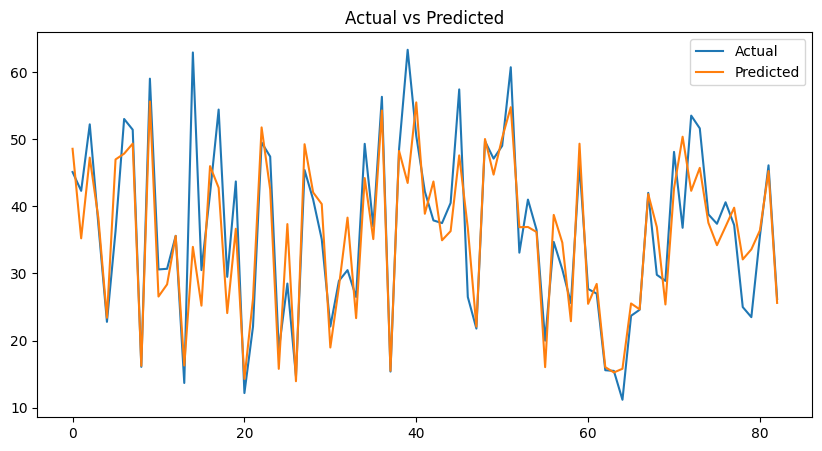

In [1049]:
# plotting a graph of actual values against predictions
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

##### Gated Recurrent Unit (GRU)

In [1050]:
gru_model = Sequential()
gru_model.add(GRU(128, activation='relu', input_shape=(x_train_rnn.shape[1], x_train_rnn.shape[2])))
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dense(1)) # output layer

print(gru_model.summary())

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 128)            │        52,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,545 (236.50 KB)

 Trainable params: 60,545 (236.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [1051]:
gru_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
gru_model.fit(x_train_rnn, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1447.0614 - val_loss: 1473.6760
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 509.6064 - val_loss: 430.5981
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 197.1045 - val_loss: 337.4303
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 125.0149 - val_loss: 109.0077
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 72.3718 - val_loss: 132.9910
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.7993 - val_loss: 114.9745
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.3422 - val_loss: 118.9533
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 48.9170 - val_loss: 111.1523
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.8363 - val_loss: 112.5307
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49.5206 - val_loss: 109.6564
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50.3208 - val_loss: 114.2098
Epoch 12/100
10/10 ━━━━

In [1052]:
y_pred = gru_model.predict(x_test_rnn)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [1053]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Log Error: {msle}")

Mean Absolute Error: 4.407047269430505
Mean Squared Error: 41.42761069827651
Root Mean Squared Error: 6.436428411648537
R2 Score: 0.7530539235336287
Mean Squared Log Error: 0.02809626972167303


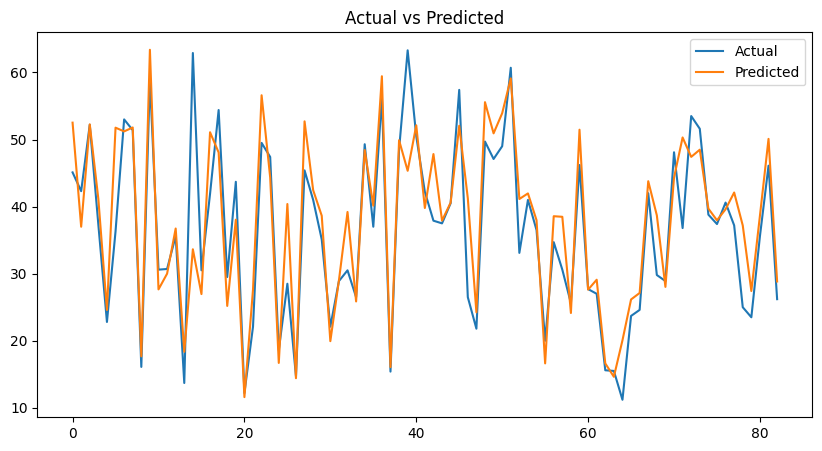

In [1054]:
# plotting a graph of actual values against predictions
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()